<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Assignment_Day_10_Muhammad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and Load Package

In [1]:
!pip install dalex
!pip install scikit-plot
!pip install skope-rules
!pip install shap
!pip install eli5
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import plot_tree, export_text
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc,roc_auc_score
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay

import statsmodels.api as sm
import statsmodels.formula.api as smf

from skrules import SkopeRules
from xgboost import XGBClassifier

import dalex as dx
import scikitplot as skplt
import shap
import eli5
from lime.lime_tabular import LimeTabularExplainer 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Dataset

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/car_insurance_fraud_dataset/insuranceFraud.csv")

# Question 1
Identifikasi berapa banyak nilai null yang terdapat di dalam dataset.

## Data Understanding

In [5]:
# see the overview of data
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


after see the overview of data, we get `?` in our column especially in `collision_type column`. But we will check it furthermore and will replace it so it will be indicated as `NaN`.

In [6]:
# check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As we can see the date column has `object` type and we have to change it later on.

In [7]:
#change data type
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_date'] = pd.to_datetime(df['incident_date'])

Next we can check the duplicate and unique value in our columns of dataset.

In [8]:
# check duplicate value
df.duplicated().sum()

0

The result tells us there is no duplicate item

In [9]:
# check unique value
for x in df.columns:
  print(f"unique of {x} ")
  print(f"{df[x].unique()}")
  print()

unique of months_as_customer 
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 

we can see that there are three columns that has `?` value, those are `collision_type`, `property_damage`, `police_report_available`. Also there is an ambigue value from `umbrella_limit`, -1000000. I think we can transform it into the positive value because it is nonsense that is a limit in minus value for claiming insurance.

After we identify those columns we can replace those value to proper missing value to answer question no.1.

In [10]:
#replace ? with NaN
replaced = ['collision_type','property_damage','police_report_available']
df[replaced] = df[replaced].replace("?", np.nan)

#replace -1000000 with 1000000
df['umbrella_limit'] = df['umbrella_limit'].replace(-1000000, 1000000)

#then check missing value
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [11]:
#check missing value percentage
df.isnull().sum()/len(df) * 100

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

In [12]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

# Question 2

Lakukan treatment pada kolom yang bernilai NA atau NULL. Berikan alasan anda mengapa anda melakukan treatment tertentu pada nilai NA tersebut.

## Missing Value Treatment

In [13]:
#check values count
for x in replaced:
  print(f"{df[x].value_counts()/len(df)}")
  print()

Rear Collision     0.292
Side Collision     0.276
Front Collision    0.254
Name: collision_type, dtype: float64

NO     0.338
YES    0.302
Name: property_damage, dtype: float64

NO     0.343
YES    0.314
Name: police_report_available, dtype: float64



As we can see, the value seemed close. In my opinion, if we remove the missing value or imputating the missing value using mode, it will make the central of tendency change. Also if we drop the column, we still don't know how important the column to our analysis and model later on. Because the percentage of missing values are huge, `17%`, `34%`, and `36%`.

I think the best we can do is imputating new value such as `Unknown`. But in real condition, maybe I will ask the business team or financial team about those missing values.



In [14]:
#imputation to unknown
df[replaced] = df[replaced].fillna('Unknown')

#recheck again
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

So, that's how I treat the missing value to answer question 2.

# Question 3
Lakukan analisis pada beberapa variabel prediktor dan interpretasikan analisisnya  dengan mengaitkan analisanya dengan variabel target. Pilihlah beberapa variabel yang akan digunakan untuk modeling berdasarkan hasil analisa.

## Target Variable Analysis

In [15]:
df['incident_location'].head()

0       9935 4th Drive
1         6608 MLK Hwy
2    7121 Francis Lane
3     6956 Maple Drive
4         3041 3rd Ave
Name: incident_location, dtype: object

In [16]:
#extracting some features
df['zipcode'] = df['incident_location'].apply(lambda x: x.split()[0])
df['incident_location'] = df['incident_location'].apply(lambda x: x.split()[1] + " " + x.split()[2])
df[['incident_location', 'zipcode', 'insured_zip']].head()

,incident_location,zipcode,insured_zip
0,4th Drive,9935,466132
1,MLK Hwy,6608,468176
2,Francis Lane,7121,430632
3,Maple Drive,6956,608117
4,3rd Ave,3041,610706


In [17]:
df['incident_date'].head()

0   2015-01-25
1   2015-01-21
2   2015-02-22
3   2015-01-10
4   2015-02-17
Name: incident_date, dtype: datetime64[ns]

In [18]:
#extracting date
df['month'] = df['incident_date'].dt.month
df['day'] = df['incident_date'].dt.day
df['day_of_weeks'] = df['incident_date'].dt.day_name()

df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,zipcode,month,day,day_of_weeks
0,328,48,521585,2015-01-25,OH,250/500,1000,1406.91,0,466132,...,13020,52080,Saab,92x,2004,Y,9935,1,25,Sunday
1,228,42,342868,2015-01-21,IN,250/500,2000,1197.22,5000000,468176,...,780,3510,Mercedes,E400,2007,Y,6608,1,21,Wednesday
2,134,29,687698,2015-02-22,OH,100/300,2000,1413.14,5000000,430632,...,3850,23100,Dodge,RAM,2007,N,7121,2,22,Sunday
3,256,41,227811,2015-01-10,IL,250/500,2000,1415.74,6000000,608117,...,6340,50720,Chevrolet,Tahoe,2014,Y,6956,1,10,Saturday
4,228,44,367455,2015-02-17,IL,500/1000,1000,1583.91,6000000,610706,...,650,4550,Accura,RSX,2009,N,3041,2,17,Tuesday


Because there will be a question regarding policy number. We can set the policy number as index to make it easier.

In [19]:
#policy number as index
df = df.set_index('policy_number')
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,zipcode,month,day,day_of_weeks
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,328,48,2015-01-25,OH,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,Y,9935,1,25,Sunday
342868,228,42,2015-01-21,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,Y,6608,1,21,Wednesday
687698,134,29,2015-02-22,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3850,23100,Dodge,RAM,2007,N,7121,2,22,Sunday
227811,256,41,2015-01-10,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,Y,6956,1,10,Saturday
367455,228,44,2015-02-17,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,650,4550,Accura,RSX,2009,N,3041,2,17,Tuesday


## EDA

first we will convert value in `fraud_reported`.

In [20]:
df['fraud_reported'] = df['fraud_reported'].replace(['Y','N'],[1,0])
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,zipcode,month,day,day_of_weeks
policy_number,,,,,,,,,,,,,,,,,,,,,
521585,328,48,2015-01-25,OH,250/500,1000,1406.91,0,466132,MALE,...,13020,52080,Saab,92x,2004,1,9935,1,25,Sunday
342868,228,42,2015-01-21,IN,250/500,2000,1197.22,5000000,468176,MALE,...,780,3510,Mercedes,E400,2007,1,6608,1,21,Wednesday
687698,134,29,2015-02-22,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3850,23100,Dodge,RAM,2007,0,7121,2,22,Sunday
227811,256,41,2015-01-10,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,6340,50720,Chevrolet,Tahoe,2014,1,6956,1,10,Saturday
367455,228,44,2015-02-17,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,650,4550,Accura,RSX,2009,0,3041,2,17,Tuesday


Then, I want to know the correlation between predictors.

In [21]:
# create predictor variables as X
X = df.drop(['fraud_reported'], axis = 1)
# create target data as y
y = df['fraud_reported']

In [22]:
# split data to train and test data
# where 30% of fraud_reported data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.3,
    stratify = y, 
    random_state=1000
)

In [23]:
# check train data dimension
X_train.shape

(700, 41)

In [24]:
# check test data dimension
X_test.shape

(300, 41)

In [25]:
# check train target counts
y_train.value_counts()

0    527
1    173
Name: fraud_reported, dtype: int64

In [26]:
# check test target counts
y_test.value_counts()

0    226
1     74
Name: fraud_reported, dtype: int64

In [27]:
# create correlation matrix
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,month,day
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.016111,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,-0.042826,-0.001455
age,0.922098,1.000000,0.029188,0.014404,0.018425,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,-0.037058,0.003697
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.009968,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,-0.026416,-0.022701
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.005956,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,-0.046097,0.028797
umbrella_limit,0.016111,0.018425,0.009968,-0.005956,1.000000,0.018913,-0.048074,-0.023235,-0.023097,-0.021997,0.021698,-0.007123,-0.038994,-0.045229,-0.022044,-0.037190,0.008578,0.058147,-0.003403,-0.008570
insured_zip,0.017895,0.025604,0.004545,0.032354,0.018913,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,-0.032630,0.027031
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.048074,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,-0.037097,0.031922
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.023235,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,0.005949,-0.009696
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023097,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,-0.003416,-0.016537
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021997,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,0.051839,0.052258,-0.013348


We can see some columns has strong correlation for example total_claim_amount and property claim. We can analyze it furthermore. Which one of that feature has stronger correlation with the target.

We can use box plot to see the impact of numerical features on fraud.

In [28]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])

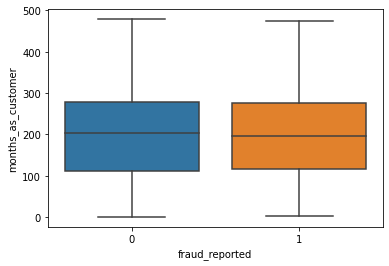

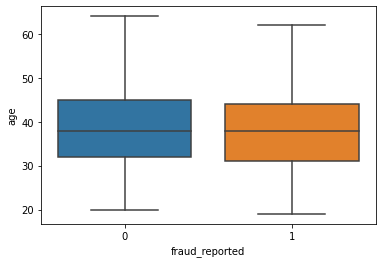

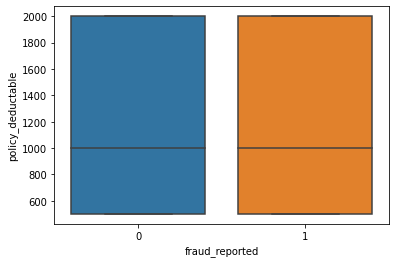

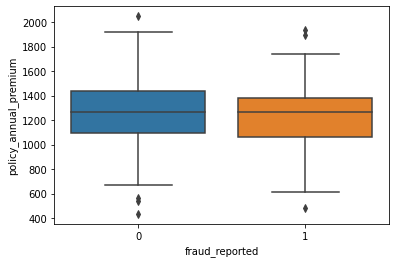

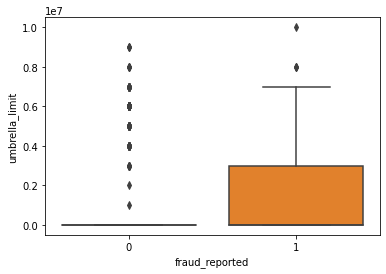

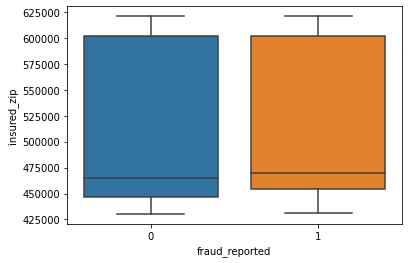

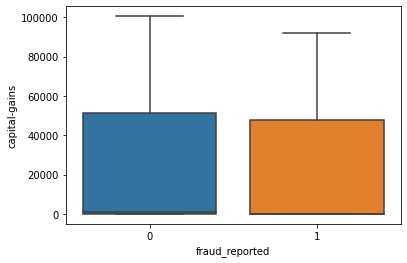

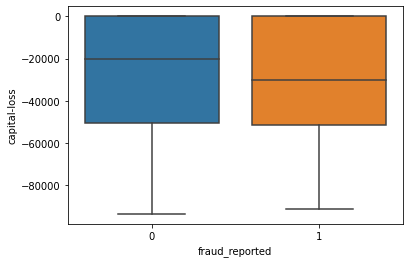

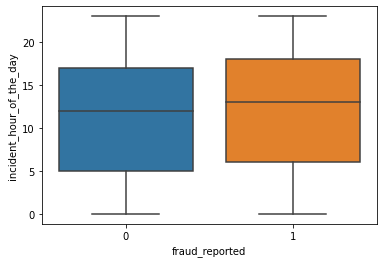

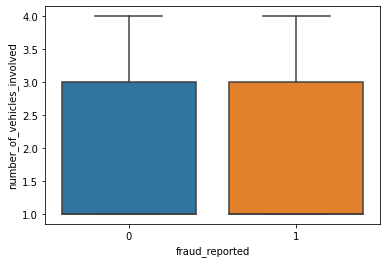

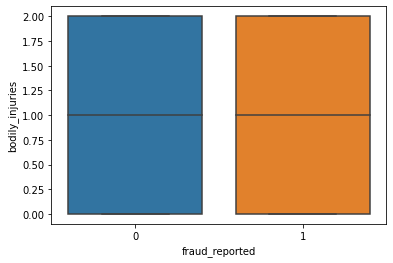

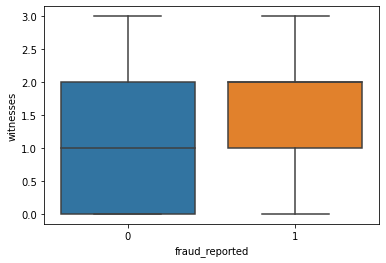

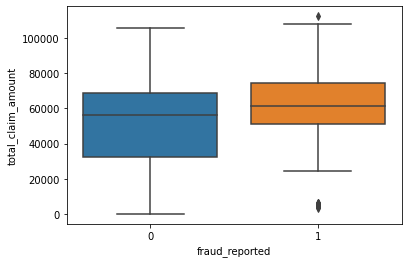

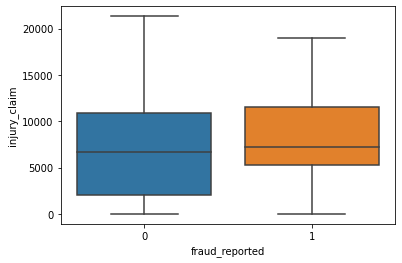

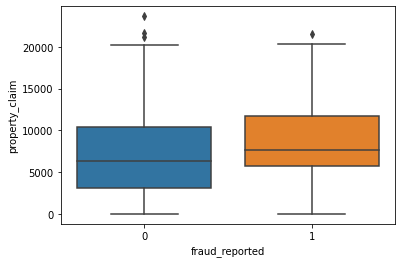

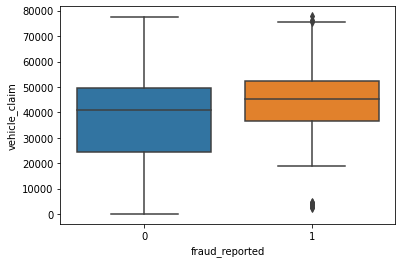

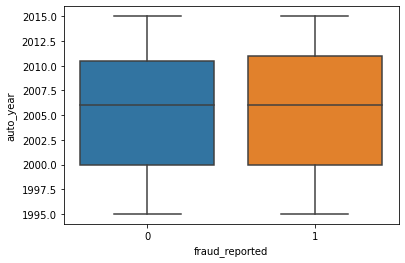

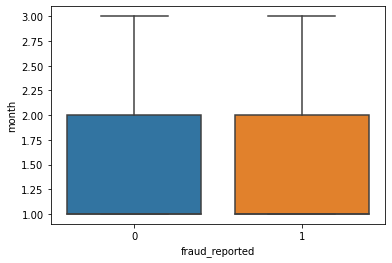

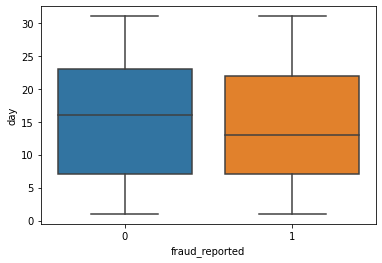

In [29]:
# plot box plot
for col_names in var_name:
  plt.figure()
  sns.boxplot(x = y_train, y = X_train[col_names]);

There are actually 5 columns that affect fraud according the plotbox by seeing the median and frequency of the data;

1. Capital Loss
2. Total Claim
3. Injury Claim
4. Property Claim
5. Vehicle Claim

But because we see that vehicle claim and total claim has very strong correlation we can drop one of this feature.

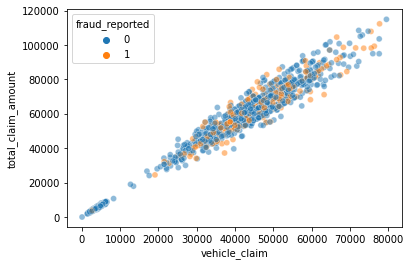

In [30]:
sns.scatterplot(data=df,x="vehicle_claim",y="total_claim_amount",hue="fraud_reported",alpha=0.5)

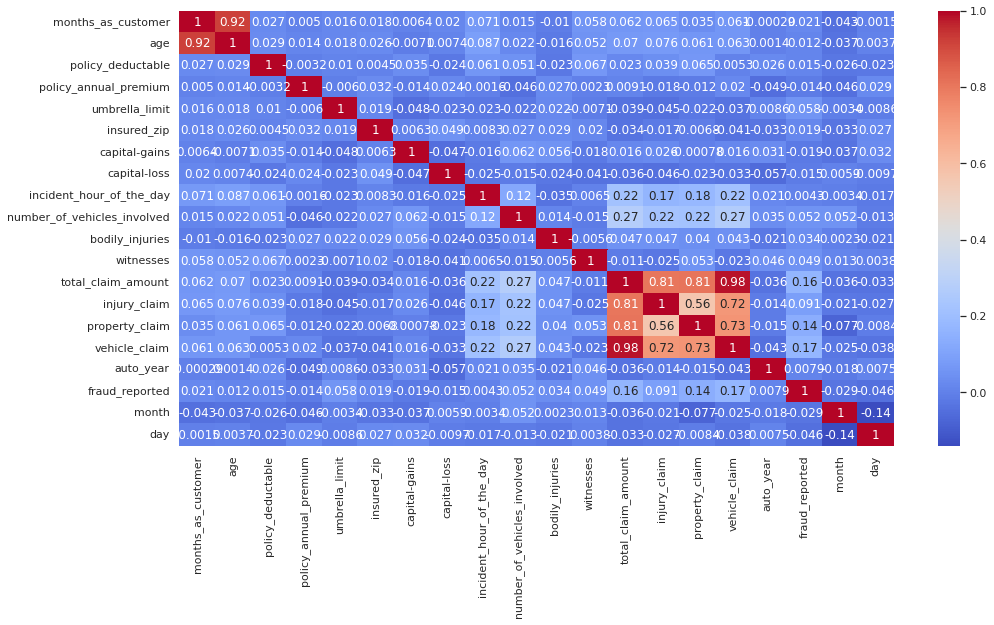

In [31]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

I think we can use only 4 of numerical feature such as `capital loss`, `injury claim`, `vehicle claim`, and `property claim`. Because `total claim` has weaker correlation than `vehicle claim`.

For the categorical that we cannot find the effect with box plot, we can use bar plot by comparing it and find the percentage or ratio with the whole data.

In [32]:
#find the categorical column
cat = df.select_dtypes(include=["object"]).columns
cat

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'zipcode', 'day_of_weeks'],
      dtype='object')

In my opinion, I think the best feature that should be in the model are `incident city`, `incident location`, `property damage`, `police report available`, `incident severity`, `umbrella` (it is included because it has categorical not numerical, because it has fixed value not continuous value), `collision type`, `incident type`, `insured hobbies`, `education level`, `occupation`, `policy csl`.

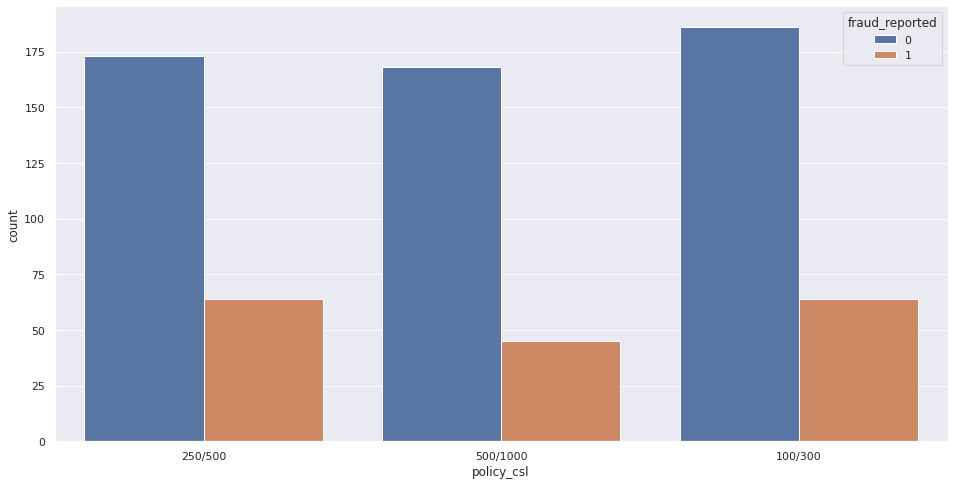

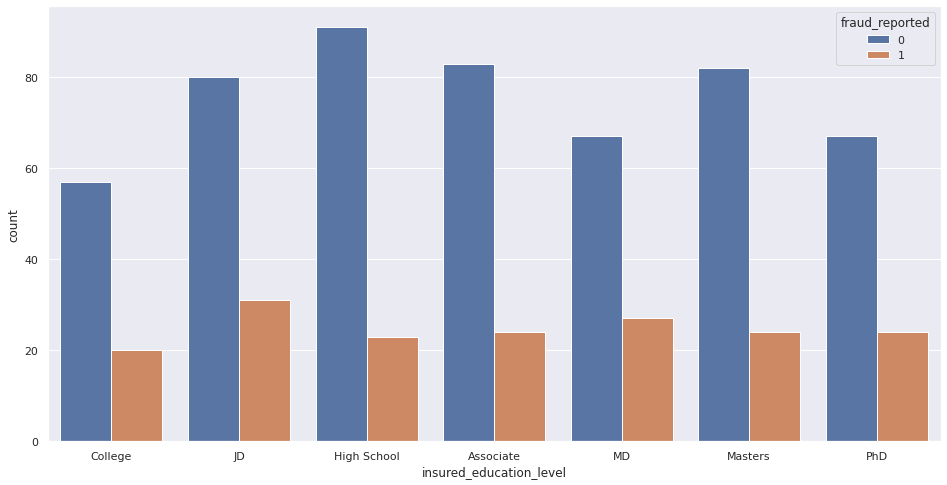

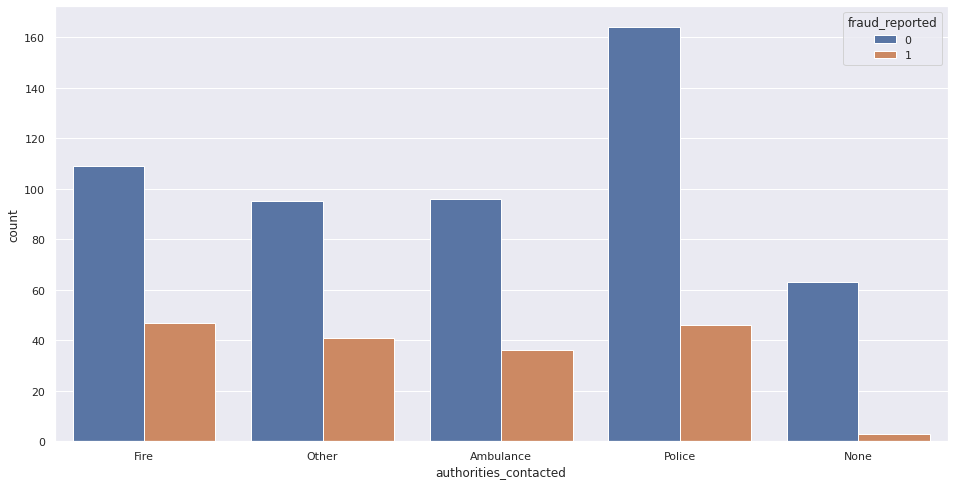

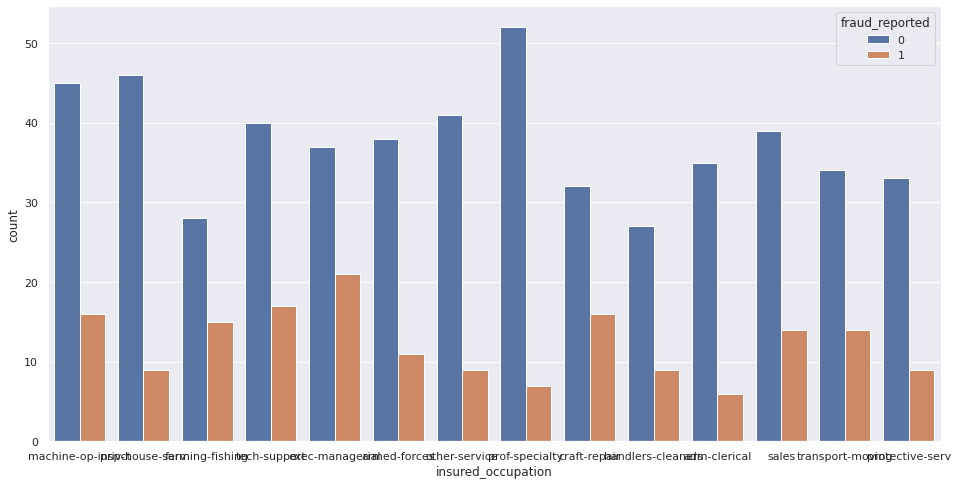

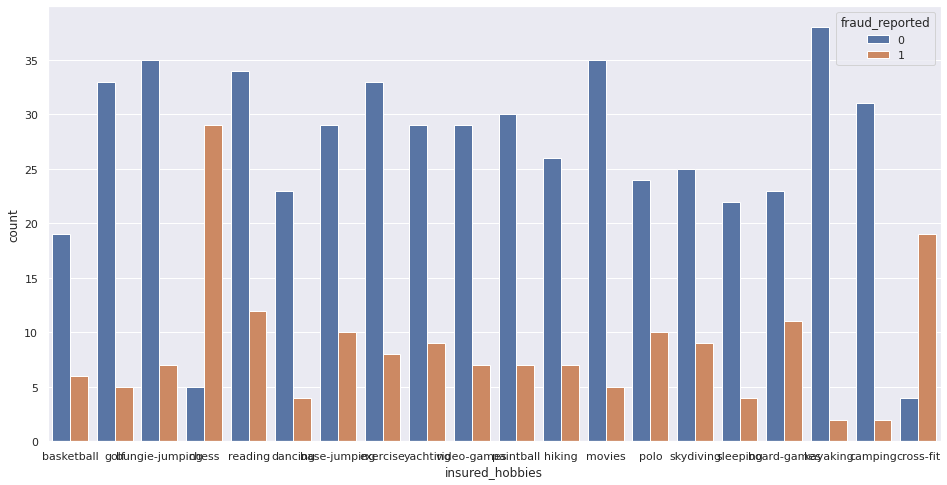

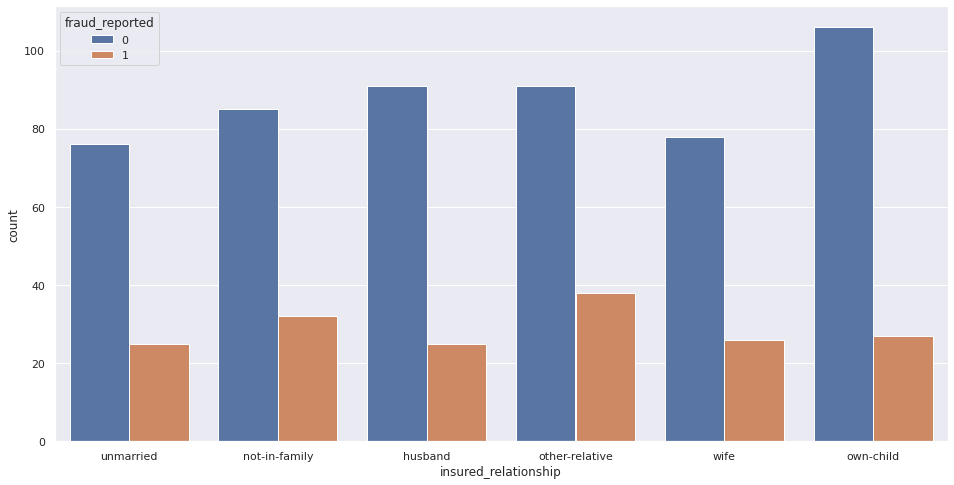

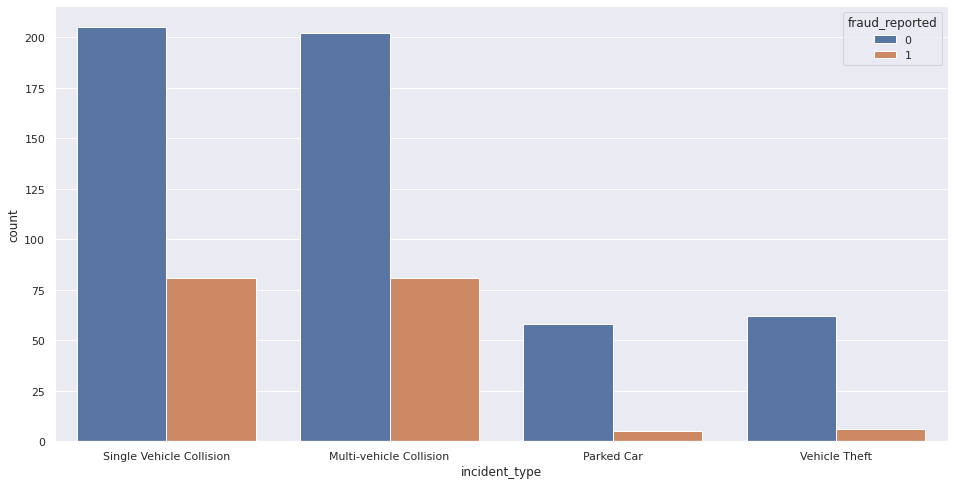

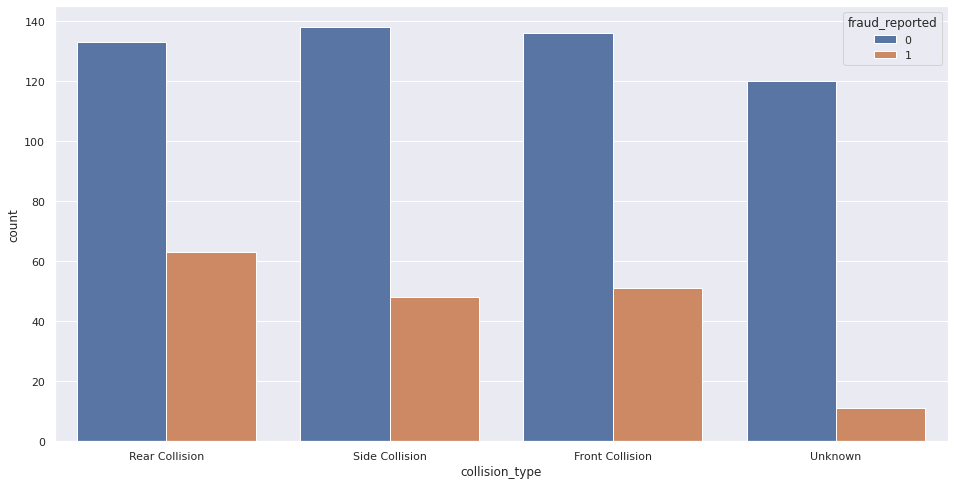

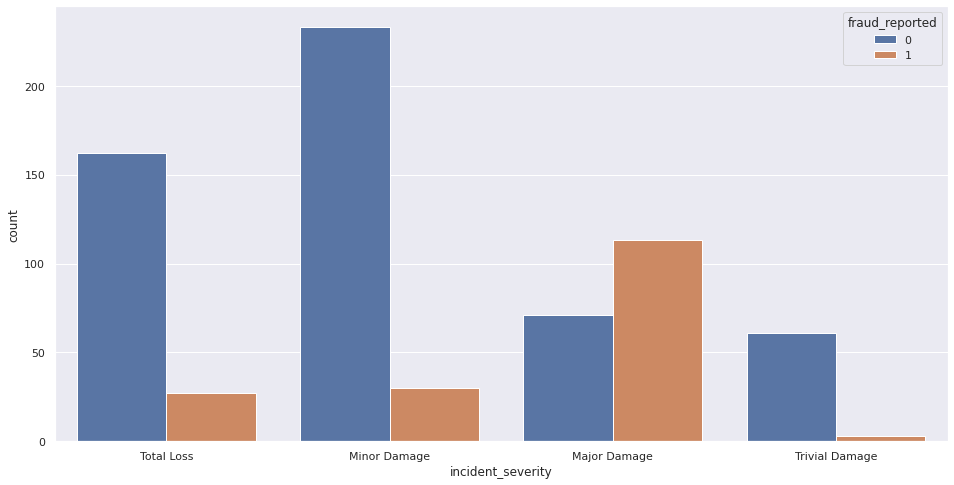

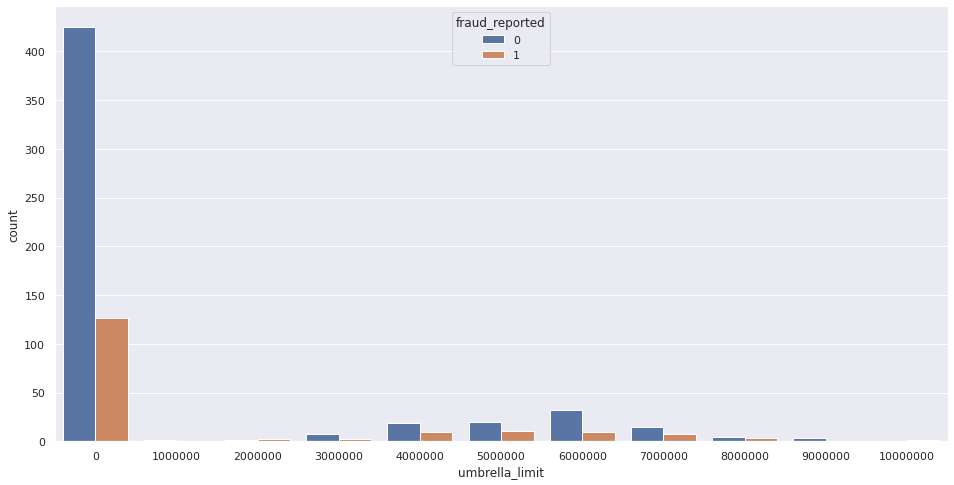

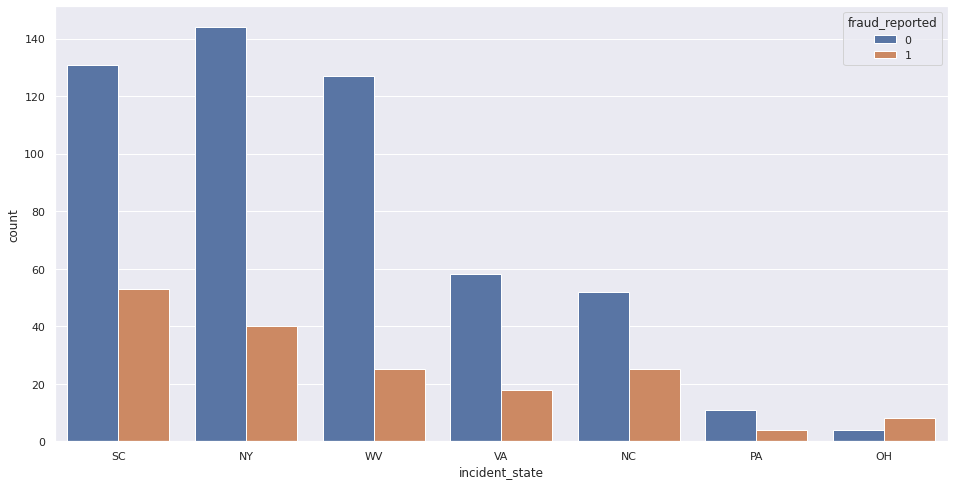

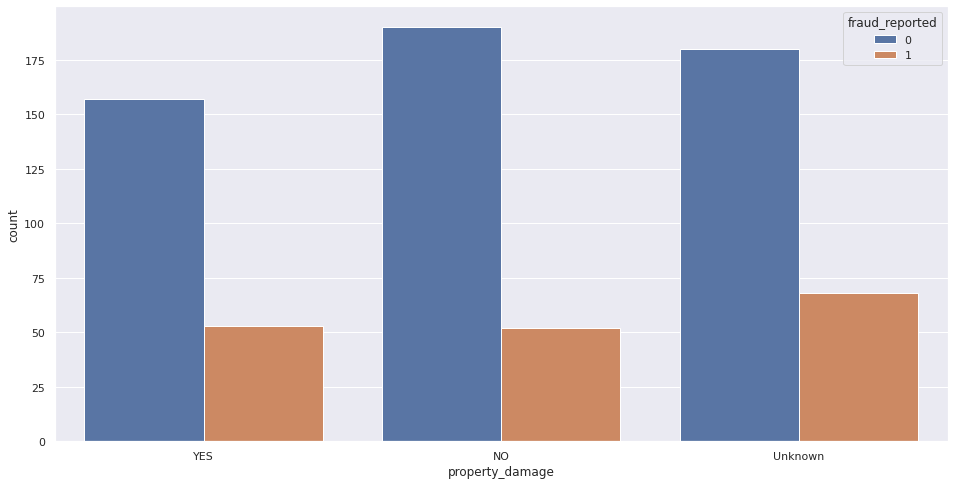

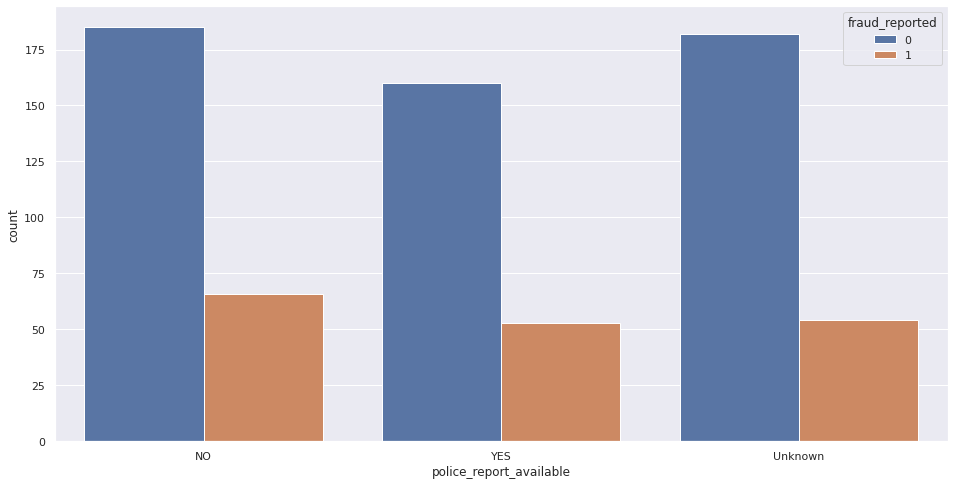

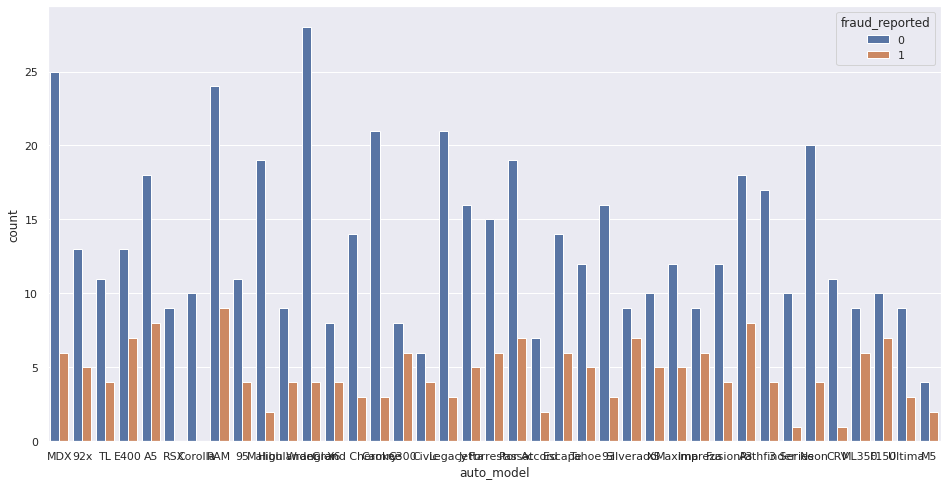

In [33]:
categ = ['policy_csl', 'insured_education_level', 'authorities_contacted',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity', 'umbrella_limit',
       'incident_state', 'property_damage', 'police_report_available', 'auto_model']

for col_names in categ:
  plt.figure()
  sns.countplot(x = X_train[col_names], hue = y_train);

We can see the value not the trend or the effect each features to target. So we can see the ratio of the data to find the trend.

In [34]:
data_trend = pd.concat([X_train, y_train], axis = 1)
data_trend.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,zipcode,month,day,day_of_weeks,fraud_reported
policy_number,,,,,,,,,,,,,,,,,,,,,
796005,173,36,2015-02-08,OH,250/500,1000,1274.63,0,441298,MALE,...,9460,33110,Accura,MDX,1995,9818,2,8,Sunday,0
184938,2,28,2015-01-17,IL,250/500,1000,1340.56,0,433184,FEMALE,...,6460,45220,Saab,92x,2008,9020,1,17,Saturday,0
615047,286,47,2015-01-17,IN,250/500,500,1386.93,0,457130,MALE,...,6580,46060,Accura,TL,2001,8188,1,17,Saturday,0
593466,435,60,2015-02-13,OH,500/1000,500,1064.49,5000000,462804,MALE,...,10480,47160,Mercedes,E400,2007,4492,2,13,Friday,1
454086,216,36,2015-01-25,IN,500/1000,1000,1152.40,0,615921,FEMALE,...,1680,3920,Mercedes,E400,2014,1681,1,25,Sunday,0


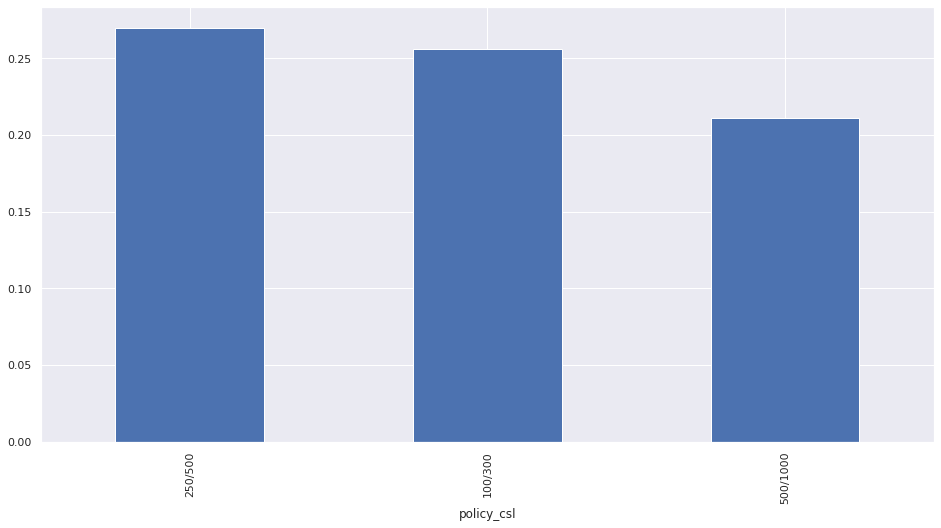

In [35]:
data_trend.groupby('policy_csl')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

there is a tendency to fraud for 250/500 and 100/300. That makes sense because the fewer injured, the easier the administration of claims. the higher the injured value, the possibility of administration such as hospitals and others will be more complicated. So they will have least tendency to do fraud.

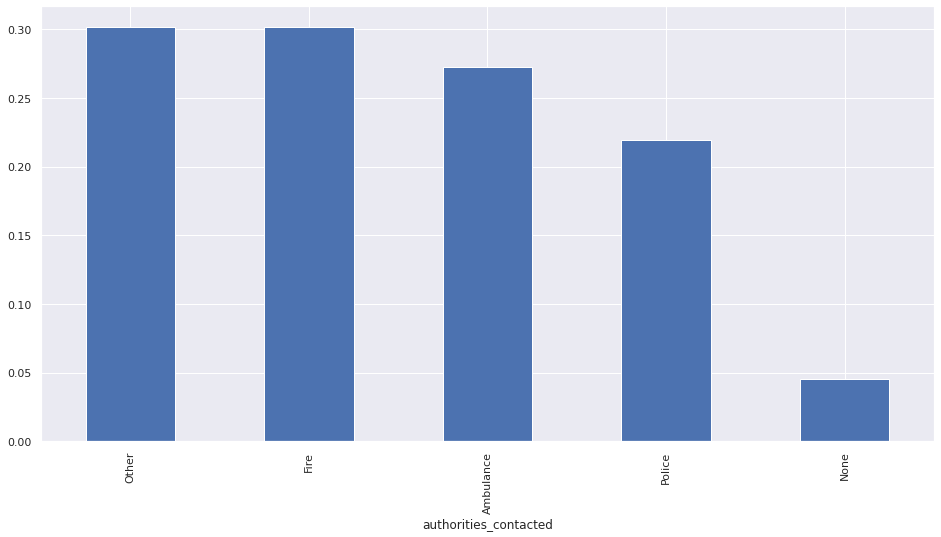

In [36]:
data_trend.groupby('authorities_contacted')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

We also can see the trend of they who contacted the authorities that has tendency to fraud.

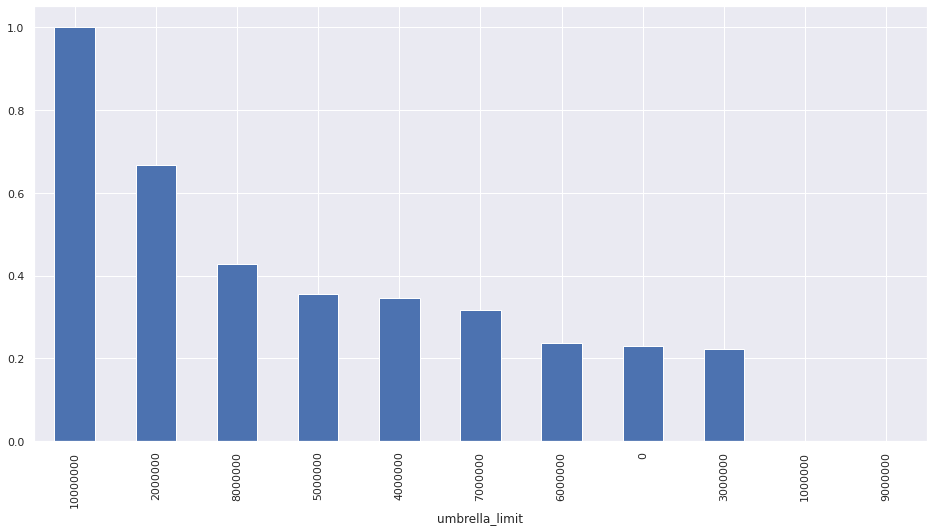

In [37]:
data_trend.groupby('umbrella_limit')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

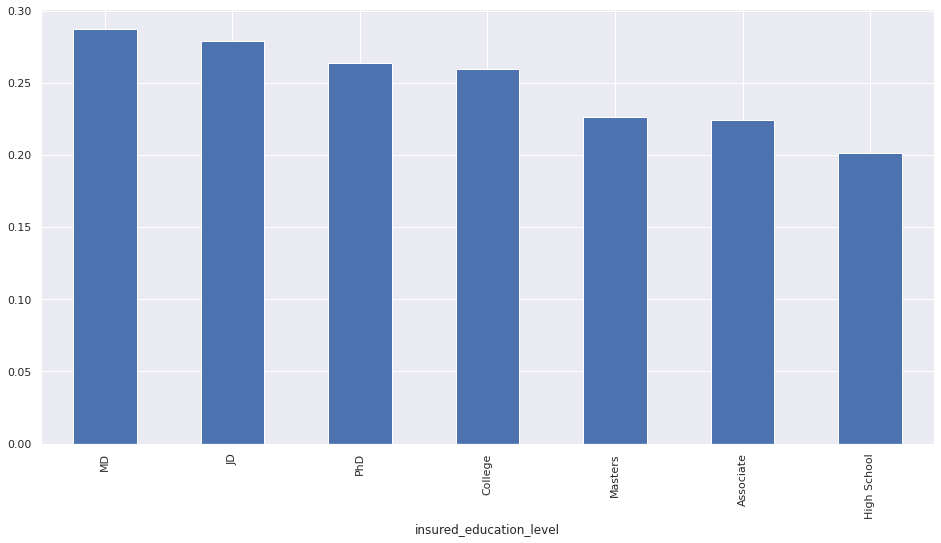

In [38]:
data_trend.groupby('insured_education_level')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

As we can see there is a tendency to fraud for insured education level. We can see the top 3 are MD, JD, and PhD. The higher their education level, there is more probability for them to fraud.

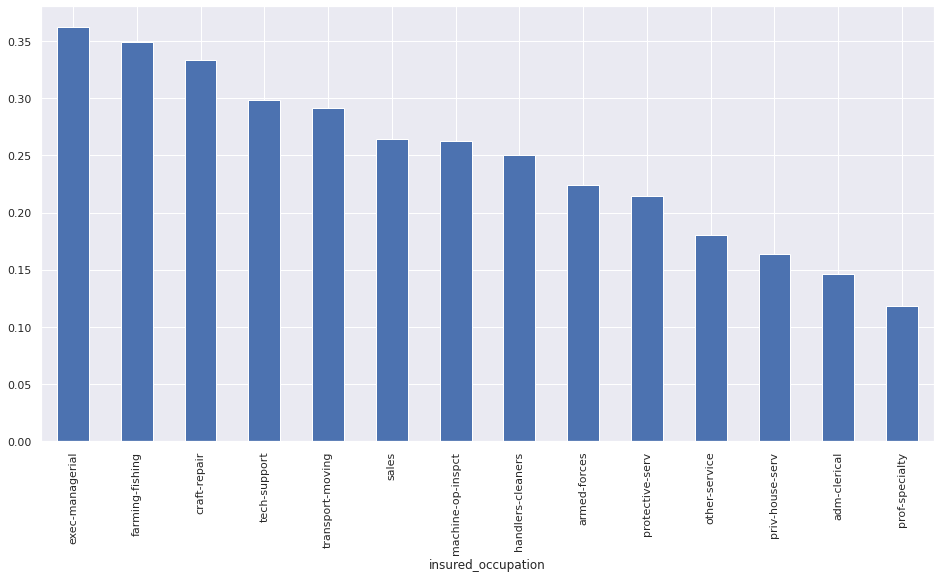

In [39]:
data_trend.groupby('insured_occupation')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

Top 3 occupation that has tendency to fraud are exec-managerial, farming-fishing, and craft repair. I have ever read about the exec-managerial doing fraud because some factors and it is called white crime. But I don't know why farming-fishing are doing fraud, but maybe they need easy money for their business. And the last craft-repair I have no clue.

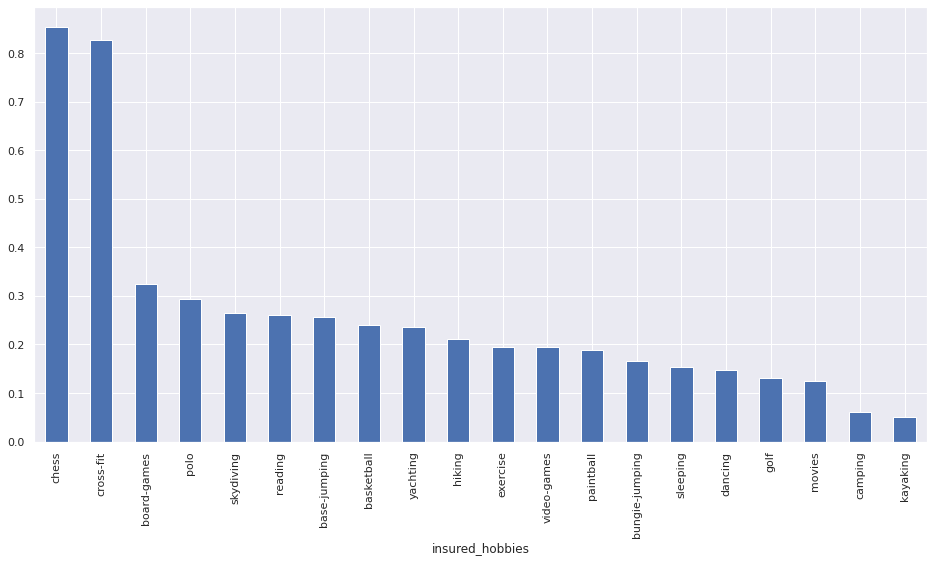

In [40]:
data_trend.groupby('insured_hobbies')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

The top 2 hobbies that has the highest tendency to fraud are they who play chess and they who doing cross-fit.

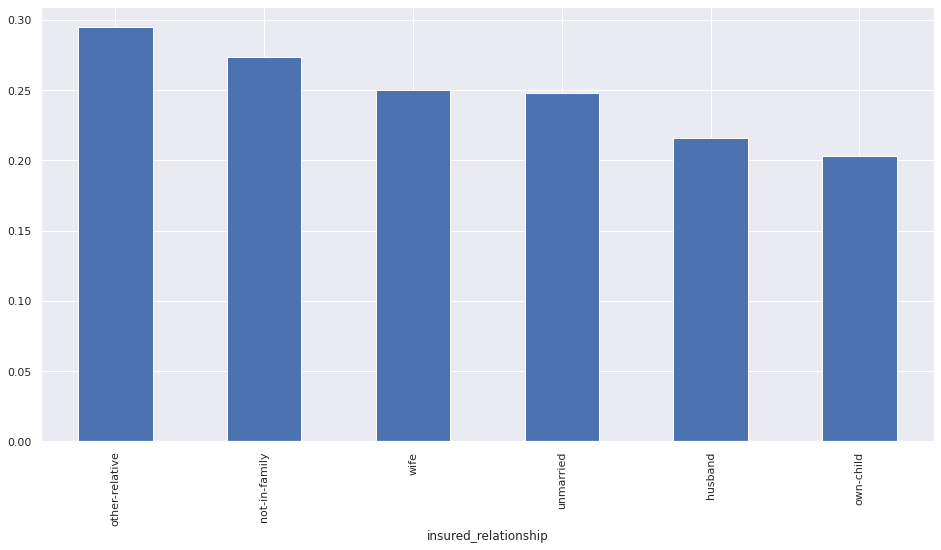

In [41]:
data_trend.groupby('insured_relationship')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

The top two who has tendency to fraud are other-relative and not-in-family. I think it makes sense, because sometimes people claim insurance using their relatives connection.

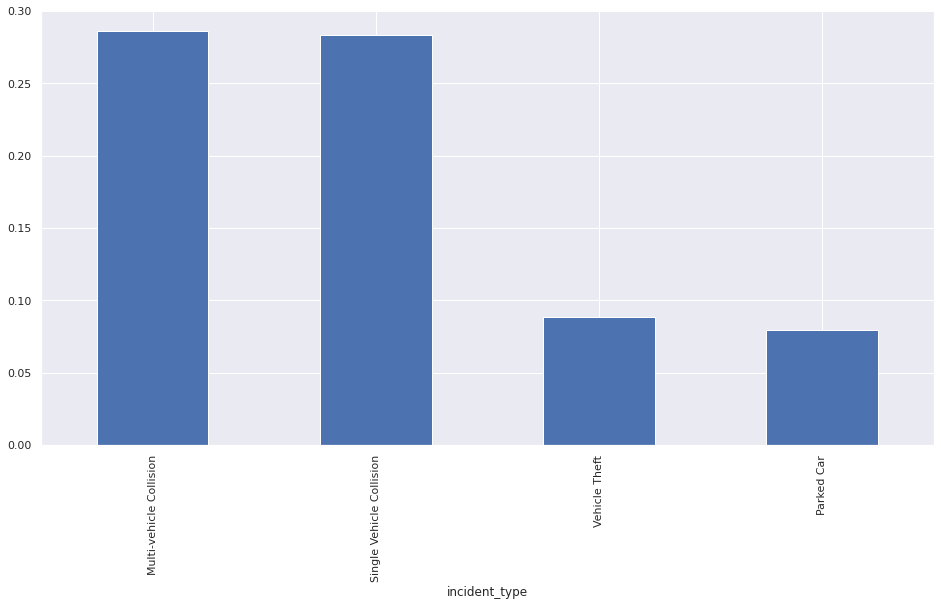

In [42]:
data_trend.groupby('incident_type')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

The top two of incident type that has tendency to fraud are Multi-vehicle Collision and Single Vehicle Collision. 

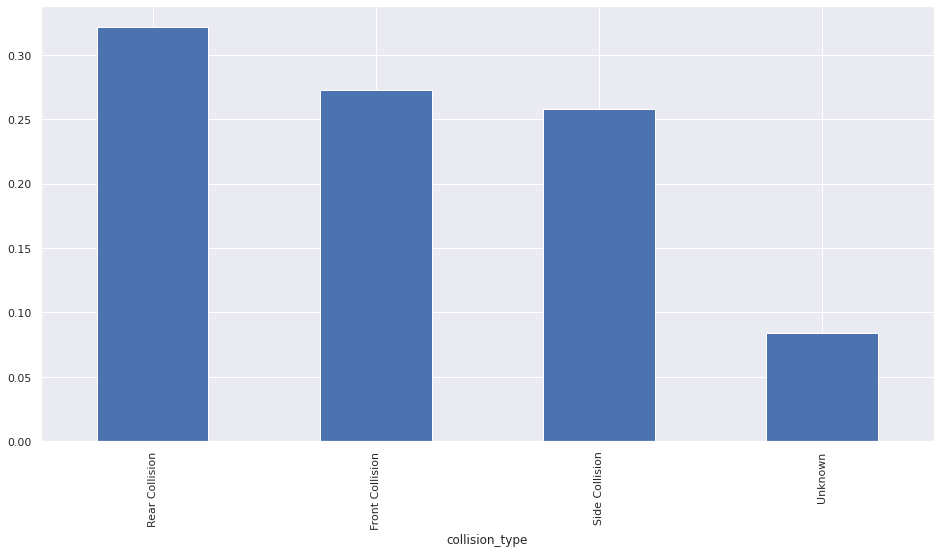

In [43]:
data_trend.groupby('collision_type')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

The top two of collision type that has tendency to fraud are rear collision and front collision. I think it makes sense for rear collision because I think people think that it makes sense when we have collision we tend to be hit in the back of the vehicle.

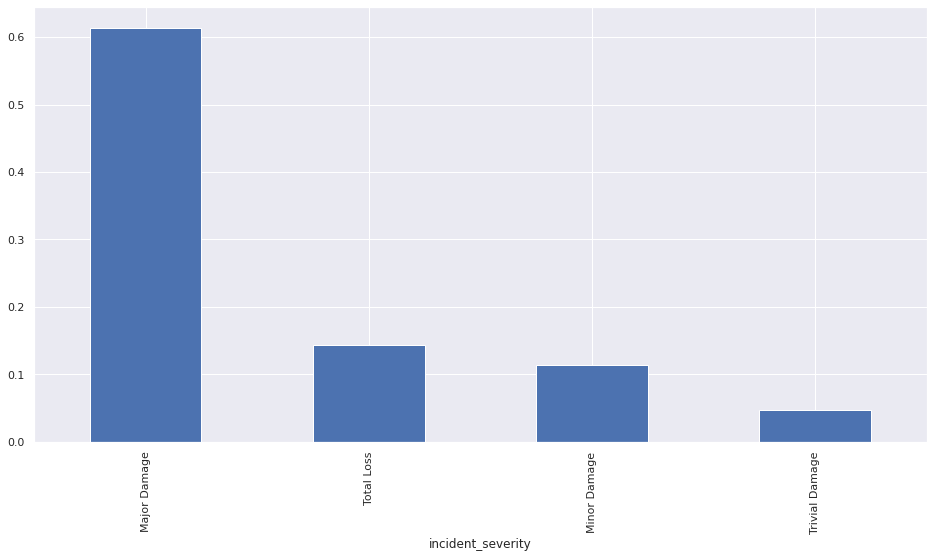

In [44]:
data_trend.groupby('incident_severity')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

Major damage be the highest tendency to fraud.

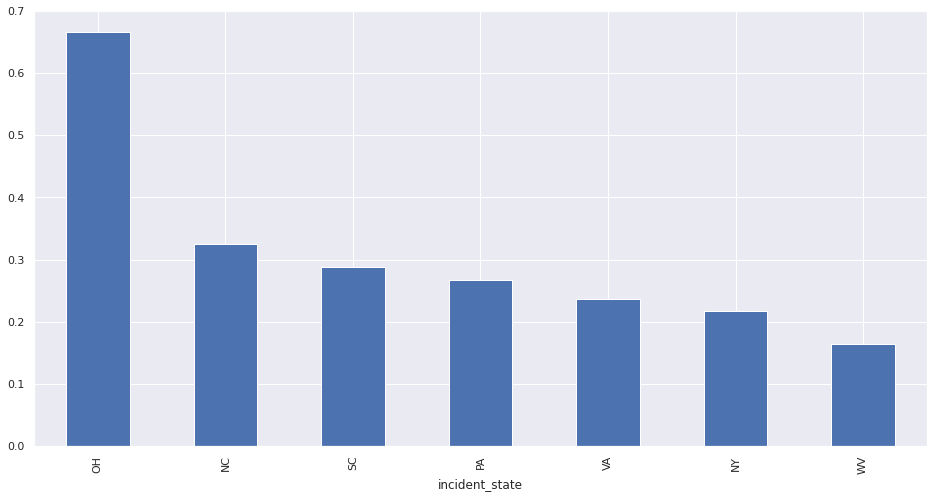

In [45]:
data_trend.groupby('incident_state')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

There are tendency to fraud in the state of OH.

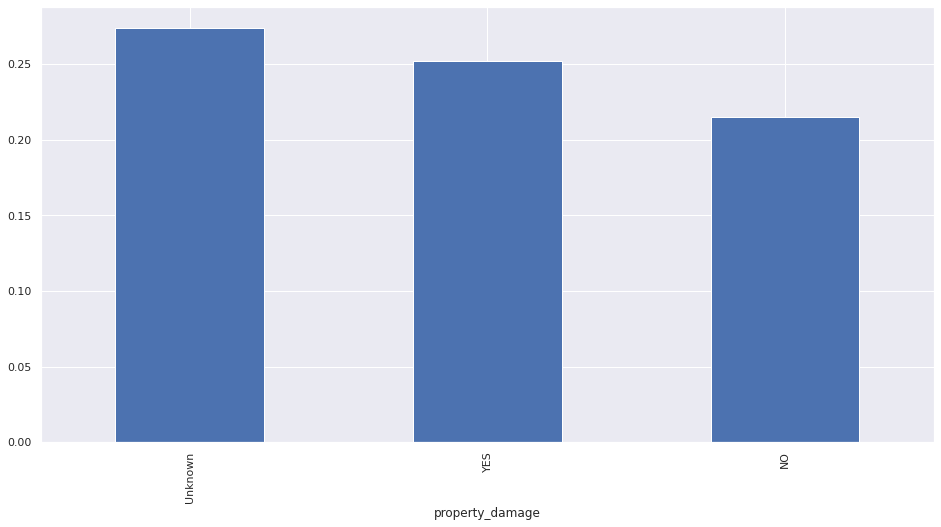

In [46]:
data_trend.groupby('property_damage')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

We can report this to the business team to be inspected because the unknown value has the best chance to fraud than the others.

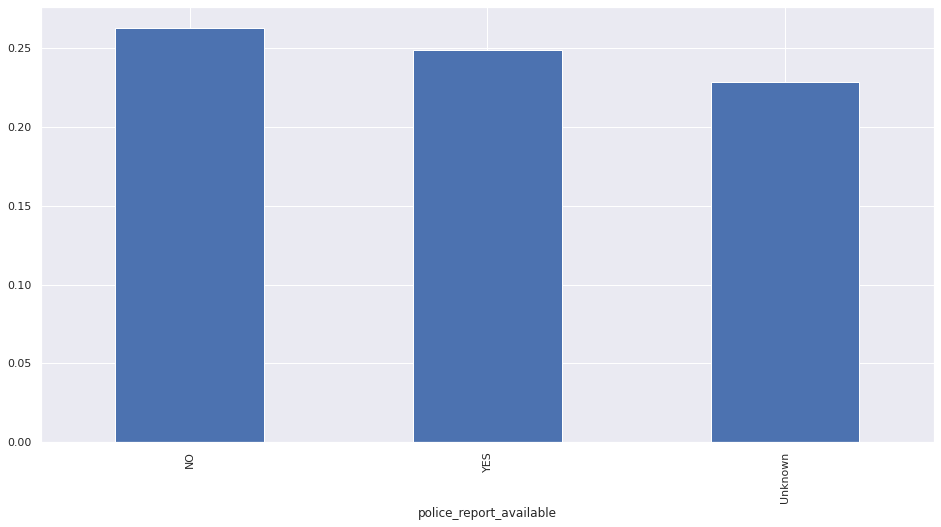

In [47]:
data_trend.groupby('police_report_available')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

As we can see, they who don't make police report have tendency to fraud.

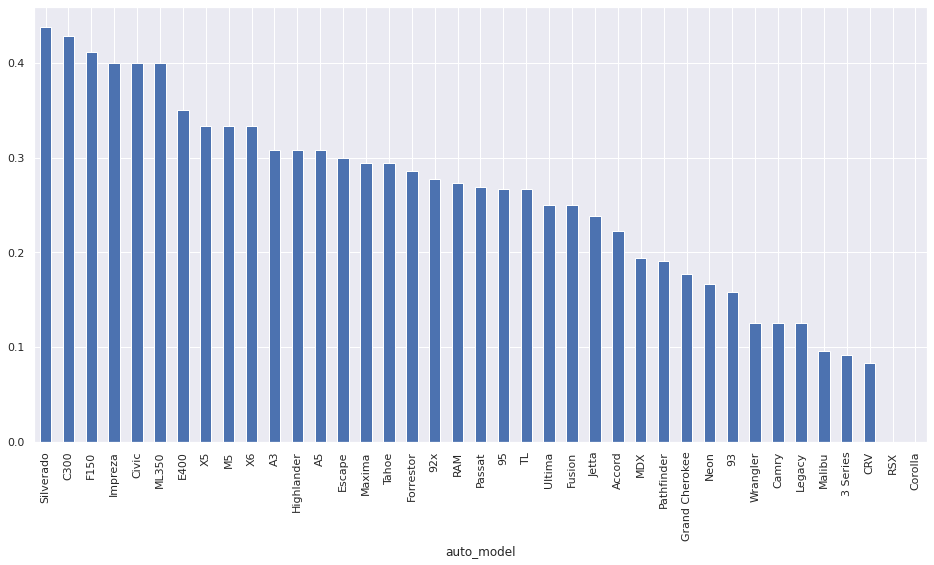

In [48]:
data_trend.groupby('auto_model')['fraud_reported'].mean().sort_values(axis = 0, ascending = False).plot(kind = 'bar')

I think it will be the list of car who the owner has tendency to fraud.

In [49]:
#update variable by dropping unused column for modelling later
X_train = X_train.drop(["insured_relationship","insured_education_level","incident_city","insured_sex","police_report_available",
                          "auto_make","zipcode","day_of_weeks","incident_date","policy_bind_date","auto_model","incident_location","month","day",
                          "insured_zip","months_as_customer","age", "policy_state"],axis=1)
X_test = X_test[X_train.columns.to_list()]


In [50]:
X_train.columns

Index(['policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_occupation', 'insured_hobbies',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

In [51]:
X_test.columns

Index(['policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_occupation', 'insured_hobbies',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

In [52]:
X_train = X_train.drop(["total_claim_amount"],axis=1)
X_test = X_test[X_train.columns.to_list()]

X_train.head()

,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_occupation,insured_hobbies,capital-gains,capital-loss,incident_type,collision_type,...,incident_state,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,auto_year
policy_number,,,,,,,,,,,,,,,,,,,,,
796005,250/500,1000,1274.63,0,machine-op-inspct,basketball,51000,0,Single Vehicle Collision,Rear Collision,...,SC,22,1,YES,2,3,9460,9460,33110,1995
184938,250/500,1000,1340.56,0,machine-op-inspct,golf,0,0,Single Vehicle Collision,Side Collision,...,NY,19,1,YES,0,2,6460,6460,45220,2008
615047,250/500,500,1386.93,0,priv-house-serv,bungie-jumping,54100,-77600,Multi-vehicle Collision,Rear Collision,...,NY,15,3,YES,0,0,13160,6580,46060,2001
593466,500/1000,500,1064.49,5000000,priv-house-serv,chess,73500,-43300,Single Vehicle Collision,Front Collision,...,WV,23,1,NO,2,1,5240,10480,47160,2007
454086,500/1000,1000,1152.40,0,priv-house-serv,reading,39600,-82400,Parked Car,Unknown,...,VA,0,1,YES,2,3,560,1680,3920,2014


# Question 4

## Data Transformation for Categoric Value

In [53]:
#ordinal category
ord_policy_csl = {'100/300':1,
                 '250/500':2,
                  '500/1000':3}
properti_damage = {"NO":0,
                   "YES":1,
                   "Unknown":2}
incident_type = {"Parked Car":0,
                 "Vehicle Theft":1,
                 "Multi-vehicle Collision":2,
                 "Single Vehicle Collision":3}
incident_severity = {"Trivial Damage":1,
                     "Minor Damage":2,
                     "Total Loss":3,
                     "Major Damage":4}

X_train["policy_csl"] = X_train["policy_csl"].map(ord_policy_csl)
X_train['incident_severity'] = X_train['incident_severity'].map(incident_severity)
X_train["incident_type"] = X_train["incident_type"].map(incident_type)
X_train["property_damage"] = X_train["property_damage"].map(properti_damage)
X_test["policy_csl"] = X_test["policy_csl"].map(ord_policy_csl)
X_test['incident_severity'] = X_test['incident_severity'].map(incident_severity)
X_test["incident_type"] = X_test["incident_type"].map(incident_type)
X_test["property_damage"] = X_test["property_damage"].map(properti_damage)

#nominal cat
cat_nom_col =["insured_occupation","insured_hobbies","authorities_contacted","collision_type","incident_state"]

#for training
dummies = pd.DataFrame()
for x in cat_nom_col:
  dummies = pd.get_dummies(X_train[x],prefix=x+"_")
  X_train = pd.concat([X_train,dummies],axis=1)

#for testing
dummies_1 = pd.DataFrame()
for x in cat_nom_col:
  dummies_1 = pd.get_dummies(X_test[x],prefix=x+"_")
  X_test = pd.concat([X_test,dummies_1],axis=1)

#drop col
X_train = X_train.drop(cat_nom_col,axis=1)
X_test = X_test.drop(cat_nom_col,axis=1)

In [54]:
X_train.head()

,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,...,collision_type__Rear Collision,collision_type__Side Collision,collision_type__Unknown,incident_state__NC,incident_state__NY,incident_state__OH,incident_state__PA,incident_state__SC,incident_state__VA,incident_state__WV
policy_number,,,,,,,,,,,,,,,,,,,,,
796005,2,1000,1274.63,0,51000,0,3,3,22,1,...,1,0,0,0,0,0,0,1,0,0
184938,2,1000,1340.56,0,0,0,3,2,19,1,...,0,1,0,0,1,0,0,0,0,0
615047,2,500,1386.93,0,54100,-77600,2,2,15,3,...,1,0,0,0,1,0,0,0,0,0
593466,3,500,1064.49,5000000,73500,-43300,3,3,23,1,...,0,0,0,0,0,0,0,0,0,1
454086,3,1000,1152.40,0,39600,-82400,0,2,0,1,...,0,0,1,0,0,0,0,0,1,0


In [55]:
for x in X_train.columns:
  print(f"unique of {x} ")
  print(f"{X_train[x].unique()}")
  print()

unique of policy_csl 
[2 3 1]

unique of policy_deductable 
[1000  500 2000]

unique of policy_annual_premium 
[1274.63 1340.56 1386.93 1064.49 1152.4  2047.59 1137.03 1151.39 1530.52
 1442.27 1362.29 1495.1  1422.56 1319.97 1359.36  936.19 1232.72 1366.9
  763.67 1380.89 1008.79  995.7  1555.94 1724.46 1347.04 1103.58 1142.48
 1334.15 1474.66 1583.91 1603.42  978.27  966.26 1136.83 1212.   1533.07
 1471.44 1425.79  875.15  709.14 1401.2  1508.12 1371.88  870.63 1155.97
 1097.57 1335.13 1072.62 1347.92 1129.23 1270.55 1346.27 1441.21 1878.44
 1107.07 1344.36 1367.99 1394.43 1106.77  998.19 1124.43 1744.64 1326.98
 1459.5  1124.69 1242.96 1454.42 1045.12 1402.75  802.24 1138.42 1537.13
 1003.23 1153.49 1398.46  795.23 1677.26 1251.65 1437.88 1262.08 1611.83
 1209.07 1105.49 1058.21 1301.13 1304.67 1127.89 1439.34 1472.77 1396.83
 1307.74 1573.93 1362.87 1554.64 1328.18 1097.64 1734.09 1199.44 1201.41
  976.37 1096.39 1245.89 1200.09 1434.51  795.31 1175.07  989.97 1073.83
 1464.42 1023.

## Logistic Regression

In [56]:
#=====Logistic regression======
logreg = LogisticRegression()

#params
random_grid = {"penalty":["elasticnet","l2"],
       "fit_intercept":[True,False],
       "C": [0.25, 0.5, 0.75, 1.0]}

scoreFunction = {"f1": "f1"}
random_search = RandomizedSearchCV(logreg,
                                   param_distributions = random_grid,
                                   n_iter = 16,
                                   scoring = scoreFunction,               
                                   refit = "f1", 
                                   return_train_score = False,
                                   random_state = 1000,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1) 

#trains and optimizes the model
random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV')

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Finished RandomizedSearchCV



24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

One or more of the test score

Mungkin preprocessing saya masih belum cukup baik dan saya masih belum menemukan caranya untuk menghandle masalah ini. Jadi untuk logistic regression akan saya lewatkan ya mas Hadi :(

## KNN

In [57]:
#======KNN====
knn = KNeighborsClassifier()

#params
random_grid = {"n_neighbors": [2,3,4,5],
       "p":[1,2]}

scoreFunction = {"f1": "f1"}
random_search = RandomizedSearchCV(knn,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,               
                                   refit = "f1", 
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1) 

#trains and optimizes the model
random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV')

The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Finished RandomizedSearchCV


              precision    recall  f1-score   support

           0       0.80      0.95      0.87       527
           1       0.64      0.29      0.40       173

    accuracy                           0.78       700
   macro avg       0.72      0.62      0.63       700
weighted avg       0.76      0.78      0.75       700



Text(120.5, 0.5, 'Real')

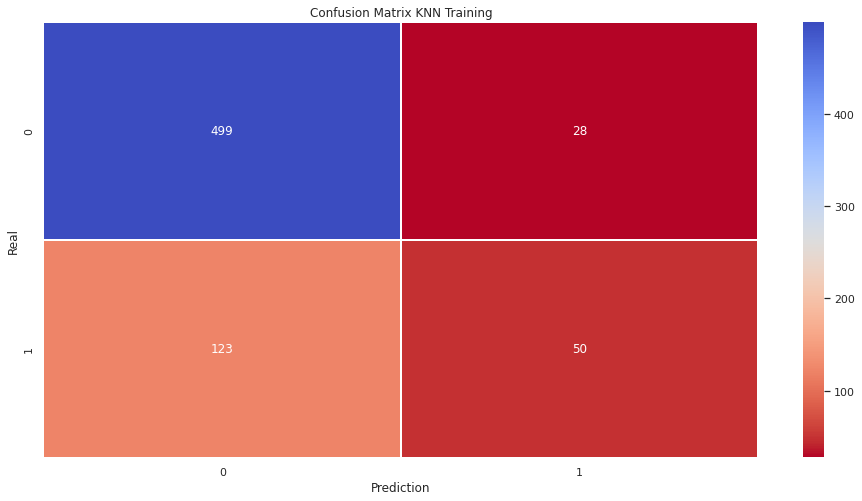

In [58]:
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train,random_search.predict(X_train)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix KNN Training')
plt.xlabel('Prediction')
plt.ylabel('Real')

In [59]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for KNN on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for KNN Forest on val data: ', round(gini_value*100, 2), '%')

AUC for KNN on val data:  80.74 %
Gini for KNN Forest on val data:  61.48 %


              precision    recall  f1-score   support

           0       0.77      0.94      0.85       226
           1       0.43      0.14      0.21        74

    accuracy                           0.74       300
   macro avg       0.60      0.54      0.53       300
weighted avg       0.69      0.74      0.69       300



Text(120.5, 0.5, 'Real')

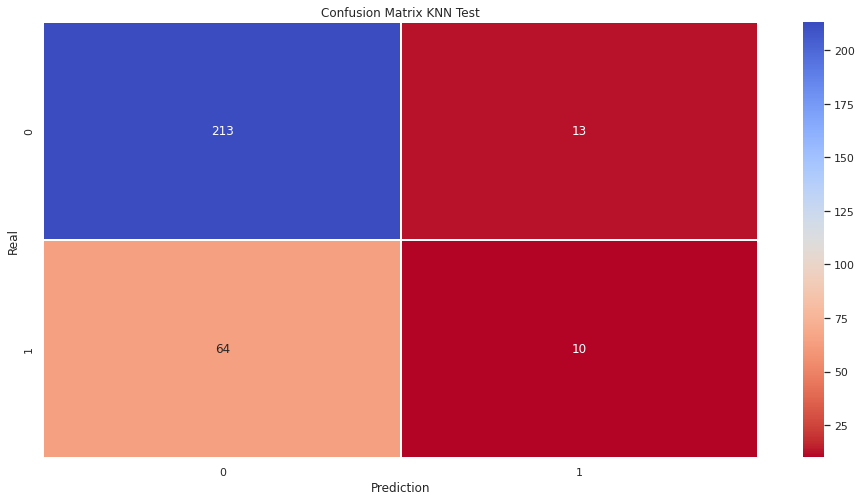

In [60]:
# predict test
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test,random_search.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix KNN Test')
plt.xlabel('Prediction')
plt.ylabel('Real')

In [61]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg  on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg  on val data: ', round(gini_value*100, 2), '%')

AUC for Logreg  on val data:  58.59 %
Gini for Logreg  on val data:  17.18 %


## Random Forest

In [62]:
#=====Random Forest======
rf = RandomForestClassifier()

random_grid = {'n_estimators': [10, 50, 100, 1000],
               'max_features': ["sqrt", "log2"],
               'max_depth': [3,5,10, None],
               'criterion':['gini','entropy']}

scoreFunction = {"f1": "f1"}

random_search = RandomizedSearchCV(rf,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,               
                                   refit = "f1", 
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1) 

#trains and optimizes the model
random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV ')

Fitting 3 folds for each of 64 candidates, totalling 192 fits


The total space of parameters 64 is smaller than n_iter=100. Running 64 iterations. For exhaustive searches, use GridSearchCV.


Finished RandomizedSearchCV 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       527
           1       1.00      1.00      1.00       173

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



Text(120.5, 0.5, 'Real')

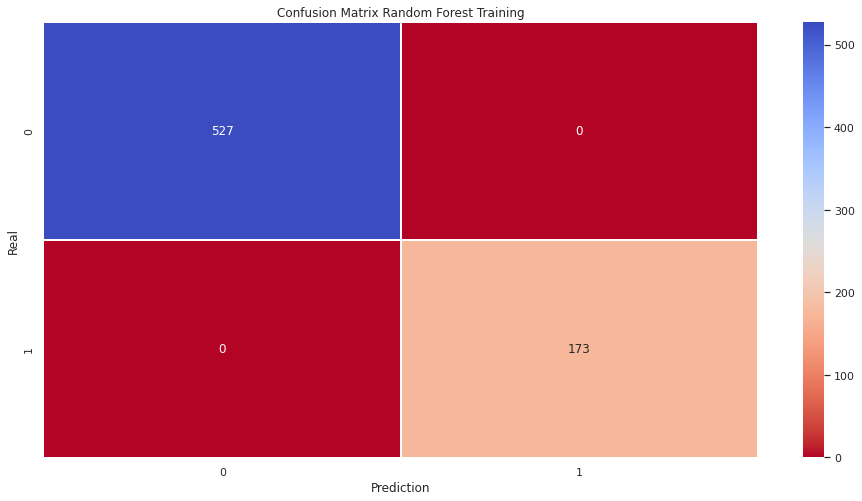

In [63]:
#pedict train
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train,random_search.predict(X_train)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix Random Forest Training')
plt.xlabel('Prediction')
plt.ylabel('Real')

In [64]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg Forest on val data: ', round(gini_value*100, 2), '%')

AUC for Logreg on val data:  100.0 %
Gini for Logreg Forest on val data:  100.0 %


              precision    recall  f1-score   support

           0       0.86      0.88      0.87       226
           1       0.62      0.57      0.59        74

    accuracy                           0.81       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.80      0.81      0.80       300



Text(120.5, 0.5, 'Real')

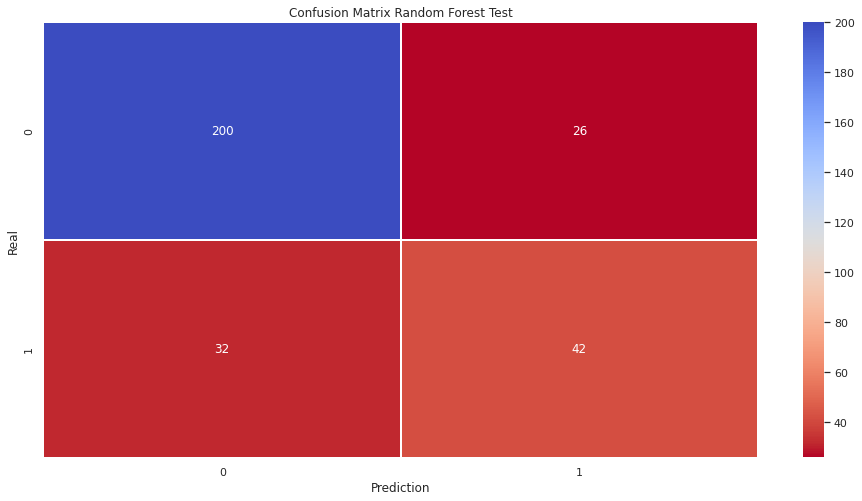

In [65]:
# predict test
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test,random_search.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix Random Forest Test')
plt.xlabel('Prediction')
plt.ylabel('Real')


In [66]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg  on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg  on val data: ', round(gini_value*100, 2), '%')

AUC for Logreg  on val data:  83.31 %
Gini for Logreg  on val data:  66.62 %


## XGBoost

In [67]:
#=====XGBoost======
xgb = XGBClassifier()


random_grid = {'n_estimators': [10, 50, 100],
               "learning_rate": [0.1, 0.05, 0.01],
               'max_depth': [3,5,10],
               "grow_policy": ["depthwise", "lossguide"]}

scoreFunction = {"f1": "f1"}

random_search = RandomizedSearchCV(xgb,
                                   param_distributions = random_grid,
                                   n_iter = 100,
                                   scoring = scoreFunction,               
                                   refit = "f1", 
                                   return_train_score = False,
                                   random_state = 0,
                                   verbose = 2,
                                   cv = 3,
                                   n_jobs = -1) 

#trains and optimizes the model
random_search.fit(X_train, y_train)

print('Finished RandomizedSearchCV ')

Fitting 3 folds for each of 54 candidates, totalling 162 fits


The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.


Finished RandomizedSearchCV 


              precision    recall  f1-score   support

           0       0.96      0.90      0.93       527
           1       0.74      0.88      0.81       173

    accuracy                           0.89       700
   macro avg       0.85      0.89      0.87       700
weighted avg       0.90      0.89      0.90       700



Text(120.5, 0.5, 'Real')

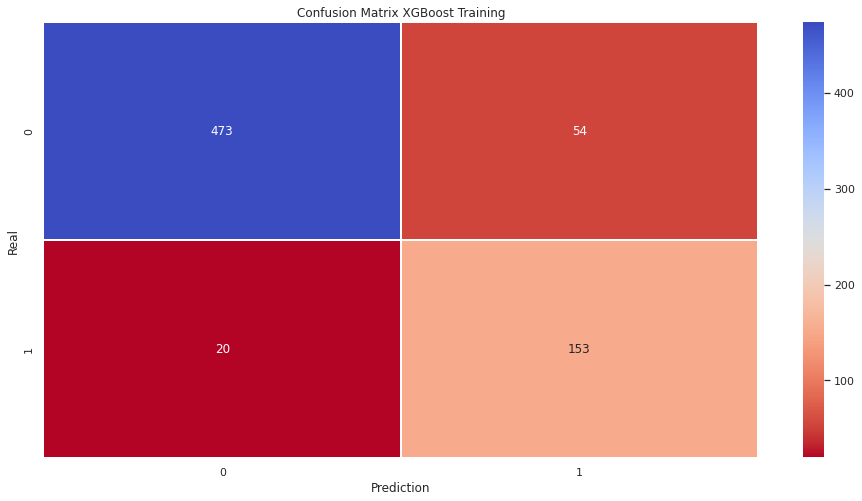

In [68]:
# predict train
cnf_matrix = metrics.confusion_matrix(y_train, random_search.predict(X_train))
print(metrics.classification_report(y_train,random_search.predict(X_train)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix XGBoost Training')
plt.xlabel('Prediction')
plt.ylabel('Real')

In [69]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train,random_search.predict_proba(X_train)[:,1])
roc_auc_value = roc_auc_score(y_train, random_search.predict_proba(X_train)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg Forest on val data: ', round(gini_value*100, 2), '%')

AUC for Logreg on val data:  91.61 %
Gini for Logreg Forest on val data:  83.22 %


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       226
           1       0.59      0.73      0.65        74

    accuracy                           0.81       300
   macro avg       0.75      0.78      0.76       300
weighted avg       0.83      0.81      0.82       300



Text(120.5, 0.5, 'Real')

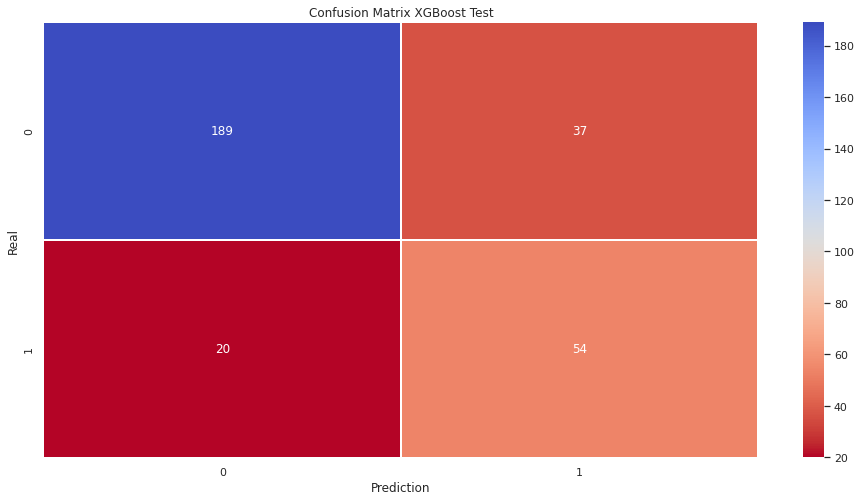

In [70]:
# predict test
cnf_matrix = metrics.confusion_matrix(y_test, random_search.predict(X_test))
print(metrics.classification_report(y_test,random_search.predict(X_test)))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix XGBoost Test')
plt.xlabel('Prediction')
plt.ylabel('Real')

In [71]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,random_search.predict_proba(X_test)[:,1])
roc_auc_value = roc_auc_score(y_test, random_search.predict_proba(X_test)[:,1]).round(4)
gini_value = ((2*roc_auc_value)-1).round(4)

print('AUC for Logreg  on val data: ', round(roc_auc_value*100, 2), '%')
print('Gini for Logreg  on val data: ', round(gini_value*100, 2), '%')

AUC for Logreg  on val data:  84.4 %
Gini for Logreg  on val data:  68.8 %


After evaluating these models, I think the best between KNN, Random Forest, and XGBoost (Logistic Regression exluded) is XGBoost.

In [72]:
# Calculate the G-mean
gmean = np.sqrt(true_positive_rate * (1 - false_positive_rate))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(threshold[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(false_positive_rate[index], ndigits = 4)
tprOpt = round(true_positive_rate[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.4244999885559082 with G-Mean: 0.8457
FPR: 0.1858, TPR: 0.8784


We can see that the best threshold is 0.4244999885559082.

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       226
           1       0.61      0.88      0.72        74

    accuracy                           0.83       300
   macro avg       0.78      0.85      0.80       300
weighted avg       0.87      0.83      0.84       300



Text(120.5, 0.5, 'Real')

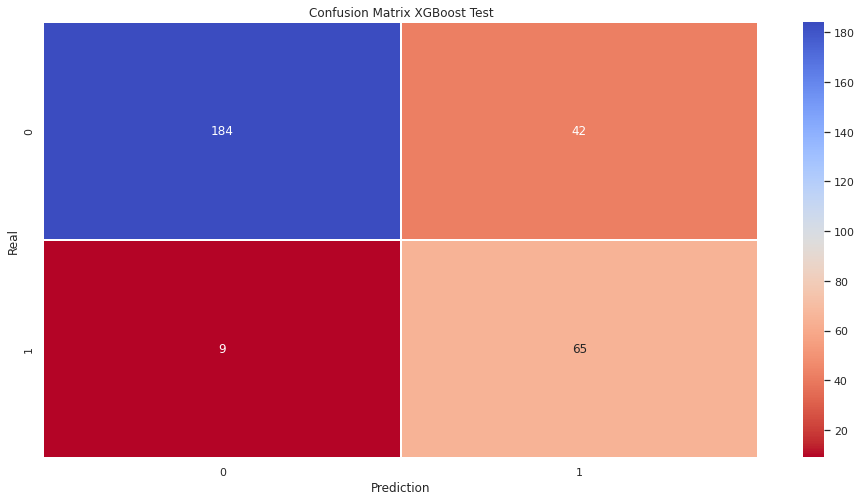

In [79]:
thrshold = 0.4244999885559082
y_pred_thr = np.where(random_search.predict_proba(X_test)[:,1]>=thrshold,1,0)
# predict test
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_thr)
print(metrics.classification_report(y_test,y_pred_thr))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix XGBoost Test')
plt.xlabel('Prediction')
plt.ylabel('Real')

After applying that threshold we got a better result.

# Question 5

Making features importance

## Feature Importance

In [74]:
feature_importance = pd.DataFrame({
    'Features':X_train.columns,
    'Importance':random_search.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False)

In [75]:
feature_importance[feature_importance["Importance"]>0]["Features"].values

array(['incident_severity', 'insured_hobbies__chess',
       'insured_hobbies__cross-fit', 'auto_year', 'policy_annual_premium',
       'authorities_contacted__Other', 'incident_type',
       'insured_hobbies__paintball', 'capital-loss', 'injury_claim',
       'authorities_contacted__Ambulance',
       'collision_type__Side Collision', 'incident_hour_of_the_day',
       'bodily_injuries', 'incident_state__PA', 'property_claim'],
      dtype=object)

##Interpreting the Model

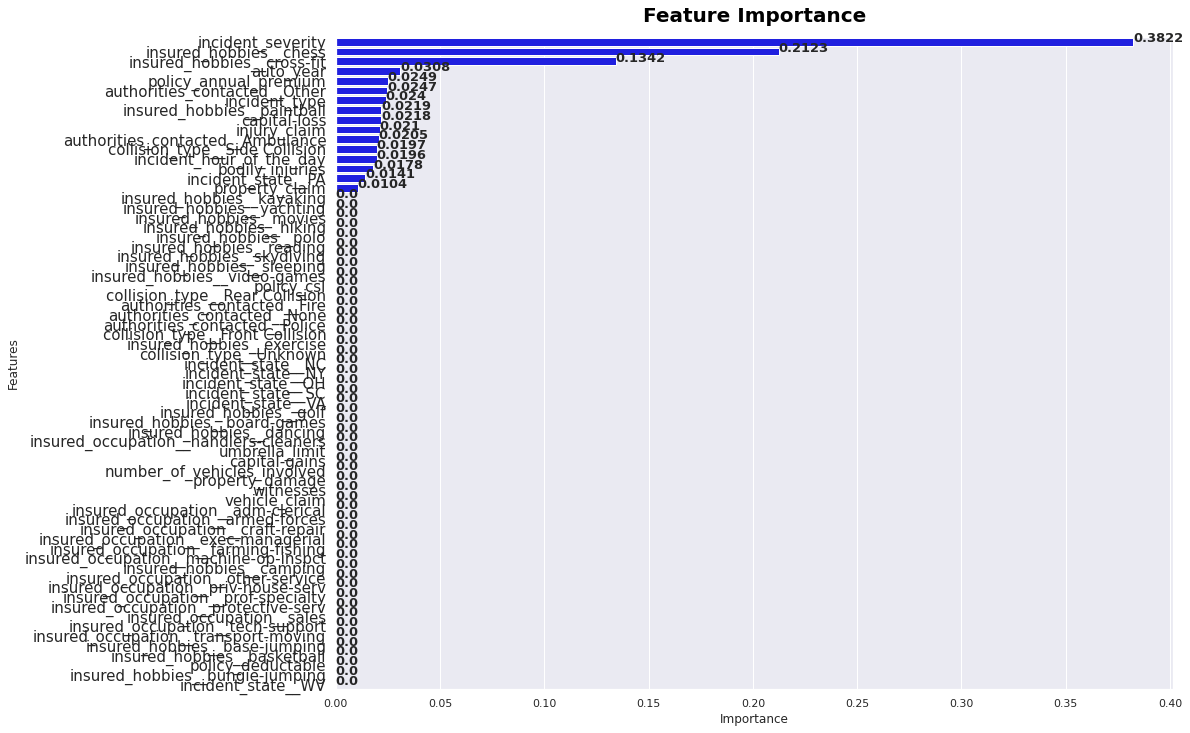

In [76]:
plt.figure(figsize=(15, 12))
sns.barplot(data=feature_importance, x='Importance', y='Features', color='blue')

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(x[i],i, round(x[i], 4), fontsize=13, fontweight='bold')

x = list(feature_importance['Importance'])
y = list(feature_importance['Features'])

plt.title('Feature Importance', fontsize=20, color='black', pad=15, fontweight='bold')
plt.yticks(fontsize=15)
addlabels(x, y)
plt.show()

In [77]:
## initiate explainer for Random Forest model
fraud_xgb_exp = dx.Explainer(random_search.best_estimator_, X_train, y_train, label = "XGBOOST Interpretation")

Preparation of a new explainer is initiated

  -> data              : 700 rows 67 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 700 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBOOST Interpretation
  -> predict function  : <function yhat_proba_default at 0x7ff4db1993b0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.211, mean = 0.338, max = 0.781
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.691, mean = -0.0913, max = 0.789
  -> model_info        : package xgboost

A new explainer has been created!


In [78]:
fraud_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 67/67 [00:11<00:00,  5.60it/s]


After looking at the model we can conclude that:

1. According to incident severity, it is more likely to someone to fraud if someone has 'Major Damage' (3.5-4)
2. It is more likely for they who have hobbies to play chess to fraud as 0.68
3. It is more likely for they who have hobbies to do cross-fit to fraud as 0.66

The business team can monitor this 3 features to prevent fraud.

# Question 6

I'll try to answer it in the future. Sorry.